In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import *
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         49.148038        84.879123         3.704132         5.769040   
1         49.621710        59.066723        27.520683        52.312960   
2         34.365697        48.638750        34.499773        77.434881   
3          0.530978        23.854919        20.473106        69.110734   
4         56.988087        78.989740        18.803471        42.640113   
5          1.706284        80.316762        52.958833        81.686034   
6         26.112675        60.789639        49.017314        88.771166   
7          5.637063        10.219354         1.194099        79.717048   
8         85.022956        95.828121        51.166362        90.129496   
9         12.228354        77.997798        56.312962        71.595754   
10        15.297201        60.954354        25.684328        49.798

In [2]:
model = IntervalAgglomerativelustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

[2 0 1 1 2 1 1 1 0 1 1 0 1 1 2 0 0 1 0 2 0 1 0 3 2 2 1 2 1 0]


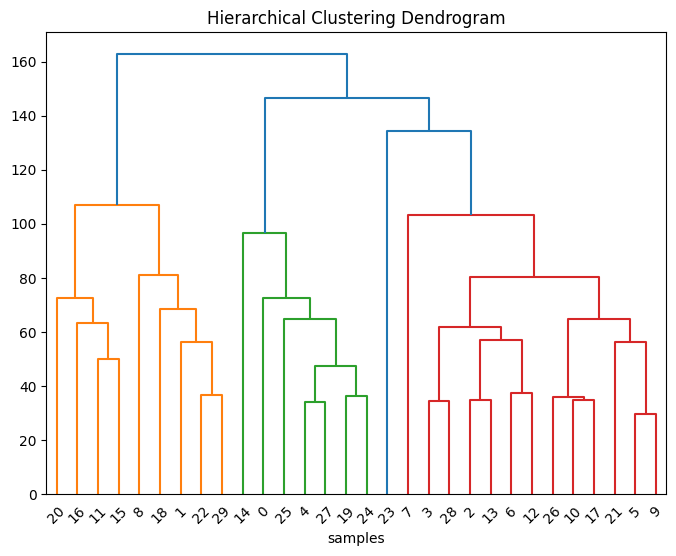

In [3]:
plt.figure(figsize=(8, 6))
ClusteringVisualization.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.07222174, 0.11221983, 0.52329901, 0.29225943],
       [0.08623161, 0.12630124, 0.5650173 , 0.22244986],
       [0.56255682, 0.22128917, 0.09037715, 0.12577686],
       [0.71203537, 0.13611547, 0.06699664, 0.08485252],
       [0.02132978, 0.01628941, 0.02128118, 0.94109964],
       [0.20932114, 0.6092318 , 0.09773139, 0.08371567],
       [0.28054263, 0.50310481, 0.120929  , 0.09542357],
       [0.55645221, 0.17937995, 0.10826337, 0.15590448],
       [0.16234327, 0.27643903, 0.31721831, 0.24399939],
       [0.19301359, 0.62720743, 0.08882783, 0.09095115],
       [0.34609507, 0.29676945, 0.10341926, 0.25371621],
       [0.13772905, 0.62345875, 0.171464  , 0.0673482 ],
       [0.61199764, 0.25446025, 0.0717518 , 0.06179031],
       [0.76405055, 0.12973002, 0.04782978, 0.05838965],
       [0.14005591, 0.11323181, 0.12106798, 0.6256443 ],
       [0.10429896, 0.5740102 , 0.24045157, 0.08123927],
       [0.19470478, 0.38393448, 0.2922894 , 0.12907135],
       [0.32103127, 0.40908164,

In [5]:
model.get_hard_assignments()

array([2, 2, 0, 0, 3, 1, 1, 0, 2, 1, 0, 1, 0, 0, 3, 1, 1, 1, 2, 3, 2, 1,
       2, 2, 3, 3, 1, 3, 0, 2])

In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (0, 1) has these sample indices => [0, 4, 14, 19, 21, 23, 24, 25, 27]
Neuron (0, 0) has these sample indices => [1, 8, 18, 22, 29]
Neuron (1, 1) has these sample indices => [2, 3, 7, 10, 12, 13, 28]
Neuron (1, 0) has these sample indices => [5, 6, 9, 11, 15, 16, 17, 20, 26]


In [8]:
som.train_batch(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (0, 0) has these sample indices => [0, 1, 8, 18, 22, 27, 29]
Neuron (1, 1) has these sample indices => [2, 3, 5, 6, 7, 9, 10, 12, 13, 28]
Neuron (0, 1) has these sample indices => [4, 14, 19, 21, 24, 25]
Neuron (1, 0) has these sample indices => [11, 15, 16, 17, 20, 23, 26]
